# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
penguins = sns.load_dataset("penguins")

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Based on the output above, we need to dummify the categorical variables, which include species, island, and sex. Along with that, we should remove na values from the dataset as we can see the fourth row does not contain information.

In [5]:
penguins = pd.get_dummies(penguins, columns = ['species', 'island', 'sex'])

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [6]:
penguins = penguins.dropna(subset = ['bill_length_mm', 'bill_depth_mm'])

In [7]:
y = penguins["bill_depth_mm"].values
X = penguins[["bill_length_mm"]].values

In [8]:
models = {}
predictions = pd.DataFrame({"bill_length_mm": X.flatten()})

In [9]:
# Simple Linear Regression Model
linear_model = LinearRegression().fit(X, y)

predictions["linear model"] = linear_model.predict(X)
models["linear"] = linear_model

In [12]:
# Quadratic Model
X2 = X ** 2
X_Quadratic = np.hstack((X, X2))
quadratic_model = LinearRegression().fit(X_Quadratic, y)

predictions["quadratic model"] = quadratic_model.predict(X_Quadratic)
models["quadratic"] = quadratic_model

In [13]:
# Cubic Model
X3 = X ** 3
X_Cubic = np.hstack((X, X2, X3))
cubic_model = LinearRegression().fit(X_Cubic, y)

predictions["cubic model"] = cubic_model.predict(X_Cubic)
models["cubic"] = cubic_model

In [14]:
# Degree 10 Model
X4 = X ** 4
X5 = X ** 5
X6 = X ** 6
X7 = X ** 7
X8 = X ** 8
X9 = X ** 9
X10 = X ** 10
X_Degree_10 = np.hstack((X, X2, X3, X4, X5, X6, X7, X8, X9, X10))
degree_10_model = LinearRegression().fit(X_Degree_10, y)

predictions["degree 10 model"] = degree_10_model.predict(X_Degree_10)
models["degree 10"] = degree_10_model

In [15]:
# Making into df
df = predictions.melt(id_vars = "bill_length_mm",
                           var_name = "model",
                           value_name = "bill_depth_mm")

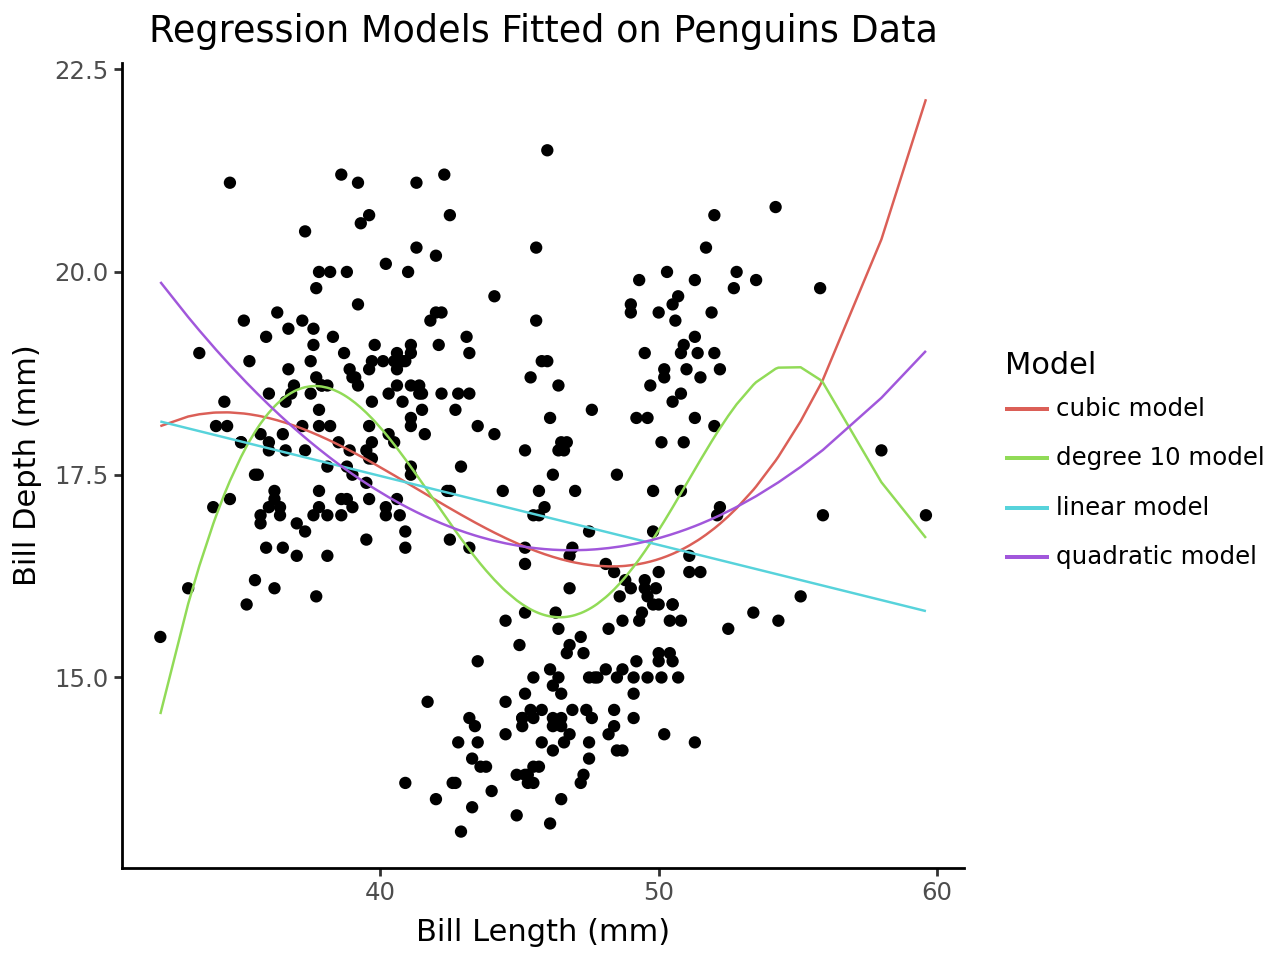

In [16]:
# Scatterplot
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_classic
(
    ggplot(penguins,
           aes(
               x = "bill_length_mm",
               y = "bill_depth_mm"))
    + geom_point()
    + geom_line(df,
                aes(color = "model"))
    + labs(
        title = "Regression Models Fitted on Penguins Data",
        x = "Bill Length (mm)",
        y = "Bill Depth (mm)",
        color = "Model"
        )
    + theme_classic()
)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

Based on the scatterplot above, it appears that the degree 1 regression (straight line) underfits the data. The model does not fully capture the relationship between bill length and bill depth. On the other hand, the degree 10 regression overfit the data because it captures too much of the relationship, which might not be a good thing because it captures the "noise or nuance" present in the data. Of the four models, degree 2 and 3 regressions do the best job at fitting the data because they are able to capture the relationship but not enough to account for the noise and nuance of the data. Between the two, I think the degree 3 regression does the best job, because it captures the inital positive relationship as well as the decreasing relationship right after, and ends off showing the positive relationship as bill length increases.